In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy import stats as st
import matplotlib.pyplot as plt
from pylab import mpl
import datetime as dt

tickers = ['AAPL','FB', 'C', 'DIS']

data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']

data

Symbols,AAPL,FB,C,DIS
Date,,,,
2018-01-02,43.064999,181.419998,74.360001,111.800003
2018-01-03,43.057499,184.669998,74.589996,112.279999
2018-01-04,43.257500,184.330002,75.510002,112.230003
2018-01-05,43.750000,186.850006,75.410004,111.620003
2018-01-08,43.587502,188.279999,74.529999,110.019997
...,...,...,...,...
2021-12-13,175.740005,334.489990,60.180000,150.429993
2021-12-14,174.330002,333.739990,60.639999,149.100006
2021-12-15,179.300003,341.660004,60.240002,150.399994


In [7]:
R=np.log(data/data.shift(1)).dropna()
w=np.array([0.25,0.25,0.25,0.25])
Rmean=R.mean()
Rcov=R.cov()
Rp=np.sum(R.mean()*w)
volp=np.sqrt(w@Rcov@w.T)
print('投资组合的μ={:.6f},σ={:.6f}'.format(Rp,volp))


def VaR_norm(miu,sigma,x,P,n):#n参数为持有期,x为置信水平
	
	z=abs(st.norm.ppf(q=1-x))#标准正态分布中1-x的概率对应的分位点
	return -(miu-z*sigma)*P*np.sqrt(n)

def VaR_lognorm(miu,sigma,x,P,n):
	
	z=abs(st.norm.ppf(q=1-x))
	return (1-np.exp(miu-z*sigma))*P*np.sqrt(n)

print('99%置信水平下1天的normal VaR为{:.2f},lognormal VaR为{:.2f}'.format(\
VaR_norm(Rp,volp,0.99,1e5,1),VaR_lognorm(Rp,volp,0.99,1e5,1)))


print('99%置信水平下10天的normal VaR为{:.2f},lognormal VaR为{:.2f}'.format(\
VaR_norm(Rp,volp,0.99,1e5,10),VaR_lognorm(Rp,volp,0.99,1e5,10)))

投资组合的μ=0.000514,σ=0.017388
99%置信水平下1天的normal VaR为3993.59,lognormal VaR为3914.90
99%置信水平下10天的normal VaR为12628.85,lognormal VaR为12380.00


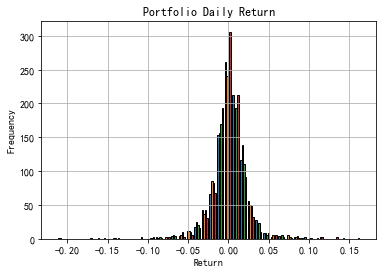

In [8]:

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
plt.hist(R,bins=40,edgecolor='k')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Portfolio Daily Return')
plt.grid()


In [9]:
rp=pd.Series((1e5*R)@w,index=R.index)

st.normaltest(rp)


NormaltestResult(statistic=301.34140003820164, pvalue=3.6689888944419276e-66)

In [10]:

#显然p＜0.01，拒绝服从正态分布的原假设，因此用参数法计算VaR可能会产生偏差
def VaR_daily(a,x):
	#求a数列第(1-x)%分位的数值的绝对值,默认升序排序
	return abs(np.percentile(a,(1-x)*100))

#print('99% confidence level daily VaR: {:.2f},10 day VAR: {:.2f}'.format(\
#VaR_daily(rp,0.99),VaR_daily(rp,0.99)*np.sqrt(10)))

num_days = 15

for i in range(1, num_days+1):
    print(str(i) + ' day value at risk ' + str(VaR_daily(rp, 0.99)*np.sqrt(i)))
    
    

1 day value at risk 4949.599221110962
2 day value at risk 6999.790346806431
3 day value at risk 8572.957328067529
4 day value at risk 9899.198442221925
5 day value at risk 11067.640319784125
6 day value at risk 12123.99252299891
7 day value at risk 13095.408628498606
8 day value at risk 13999.580693612863
9 day value at risk 14848.797663332887
10 day value at risk 15652.007043706008
11 day value at risk 16415.963479060396
12 day value at risk 17145.914656135057
13 day value at risk 17846.0337847122
14 day value at risk 18519.70448724038
15 day value at risk 19169.71535376396
